In [1]:
#Importing libraries required for the cifar-10 dataset..
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

In [2]:
#Loading the cifar-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [3]:
#Printing the dimensions
#Data set is divided as 90% training data and 10% test data
print("Training Images are: ",train_images.shape)
print("Training labels are: ",train_labels.shape)
print("Test Images are: ",test_images.shape)
print("Test Labels are: ",test_labels.shape)

Training Images are:  (50000, 32, 32, 3)
Training labels are:  (50000, 1)
Test Images are:  (10000, 32, 32, 3)
Test Labels are:  (10000, 1)


In [4]:
#Assuming the Classnames as follows Given.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

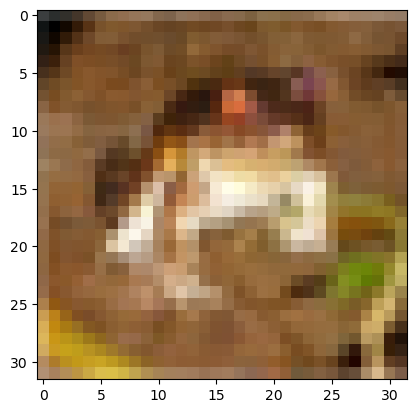

[6] frog


In [5]:
#Printing a sample image and its label.
plt.imshow(train_images[0])
plt.show()
print(train_labels[0],class_names[train_labels[0][0]])

In [6]:
#Fetching the range of the given dataset from the images for the purpose of normalizing the dataset.
print(train_images.min(),train_images.max())

0 255


In [7]:
#Preprocessing the dataset to 0 to 1.0

train_images = train_images/255.0
test_images = test_images/255.0
print(train_images.min(),train_images.max())

0.0 1.0


In [8]:
#Libraries for the defining of the model architecture.
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Activation, Flatten

In [9]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
#Defining the Model
#Model Is a sequential layered model it is in the form of layer by layer.
model = Sequential()
#Defining the Convolution for the input features.
#The Images Consists of 3 filters namely RGB.So,because of which we see the input_size as 32*32*3
#Convolutional Neural Networks Use the Edges and corners and it is best coming to images or higher dimensional inputs.
#MaxPooling is used as Scalable feature between the Convolutional Neural Network Layers.
#Shared Weights and Bias Terms are Present.
model.add(Conv2D(96,(3,3),activation='relu',input_shape = (32,32,3)))
#Metrics Explaination (32-3+1,32-3+1)=>(30,30,96)=>Output
#Parameters[96*(3*3*3)+96]
model.add(MaxPooling2D(pool_size=(2,2)))
#Output:[resized to (15,15,96)]

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flattening the Dataset to pass the datapoints to the Dense layer Where the end of neural network contains Dense Connections 
#to get Weights and Patterns out of it.
model.add(Flatten())
model.add(Dense(32,activation='relu'))
#Output Layer will be in the form of Class_Names As represented Above..
model.add(Dense(10,activation='softmax'))
#Getting the model summary means getting all the parameters and description about the model.
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 96)        2688      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        55360     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 32)                7

In [11]:
#Compiling the dataset.
#Loss Function is considered based on the Output classes present for the Given data which are 10 and we choose categorical cross entropy.
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
#Training the model with given input.
history = model.fit(train_images, train_labels, epochs=10, batch_size = 60, validation_split=0.2)

Epoch 1/10
667/667 [==============================] - 43s 63ms/step - loss: 1.6501 - accuracy: 0.4009 - val_loss: 1.3800 - val_accuracy: 0.5066
Epoch 2/10
667/667 [==============================] - 42s 63ms/step - loss: 1.2837 - accuracy: 0.5434 - val_loss: 1.2130 - val_accuracy: 0.5744
Epoch 3/10
667/667 [==============================] - 42s 62ms/step - loss: 1.1518 - accuracy: 0.5946 - val_loss: 1.1519 - val_accuracy: 0.5906
Epoch 4/10
667/667 [==============================] - 46s 68ms/step - loss: 1.0593 - accuracy: 0.6265 - val_loss: 1.0551 - val_accuracy: 0.6373
Epoch 5/10
667/667 [==============================] - 48s 73ms/step - loss: 0.9952 - accuracy: 0.6515 - val_loss: 1.0289 - val_accuracy: 0.6431
Epoch 6/10
667/667 [==============================] - 42s 62ms/step - loss: 0.9502 - accuracy: 0.6696 - val_loss: 1.0040 - val_accuracy: 0.6531
Epoch 7/10
667/667 [==============================] - 39s 58ms/step - loss: 0.9087 - accuracy: 0.6832 - val_loss: 1.0340 - val_accuracy:

In [13]:
#Evaluating the models loss and accuracy with test data.
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=0)
print(test_loss,test_acc)

0.9409742951393127 0.6801999807357788


In [14]:
#Saving the model for the future references.
model.save('cifar-10(Assigment).h5')

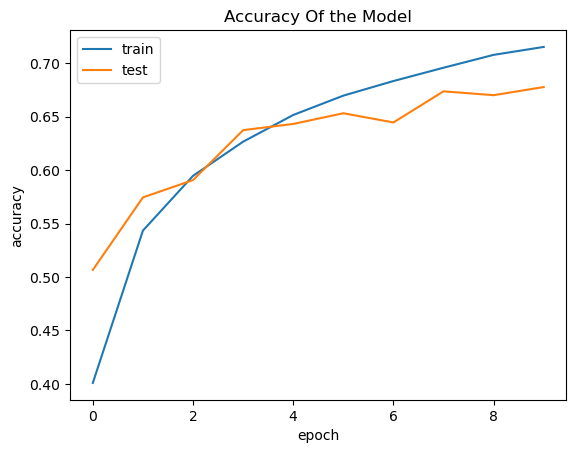

In [15]:
#Plot visualizations for training and validation accuracy and loss over epochs.

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Of the Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

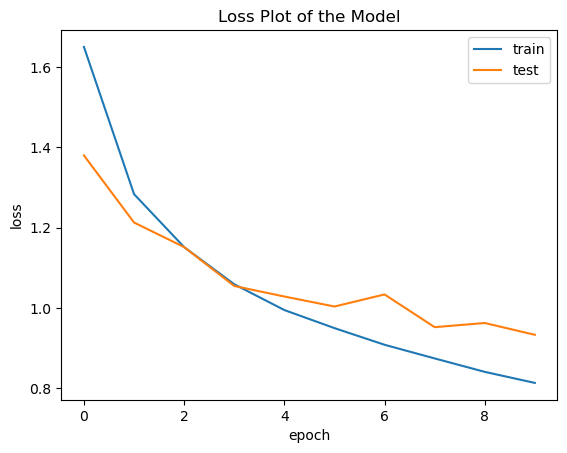

In [16]:
#Loss plot for the trained and test data.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Plot of the Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [17]:
#Predicting the Models Outputs on the test data.

prediction = model.predict(test_images)

313/313 [==============================] - 3s 7ms/step


In [18]:
#etting the Shape of the prediction and test_labels
prediction.shape,test_labels.shape

((10000, 10), (10000, 1))

In [19]:
#Getting the each max value from the Predication matrix.
np.argmax(prediction,axis=1)

array([3, 8, 1, ..., 5, 1, 7], dtype=int64)

In [20]:
#Gives the detailed overview about the Predication of the outputs.
from sklearn.metrics import confusion_matrix

confusion_matrix(np.argmax(prediction,axis=1),test_labels)

array([[669,  17,  49,  16,  24,  14,   5,  12,  68,  31],
       [ 25, 850,   7,  12,   8,   6,   7,   9,  51, 118],
       [114,  17, 655, 128, 163,  93,  92,  68,  16,  14],
       [ 17,   5,  44, 411,  55, 103,  57,  29,  10,  14],
       [ 13,   3,  62,  50, 540,  31,  35,  53,   6,   6],
       [ 11,   4,  90, 248,  58, 682,  38,  94,  12,  12],
       [  7,   6,  48,  57,  63,  15, 742,   9,   3,   7],
       [ 10,   3,  23,  37,  70,  35,   8, 695,   1,  13],
       [ 97,  23,  10,  16,  15,  10,  10,   5, 802,  29],
       [ 37,  72,  12,  25,   4,  11,   6,  26,  31, 756]], dtype=int64)

In [21]:
#Overall Statistical Observations of the predications over the actual results are compared here.
from sklearn.metrics import classification_report
print(classification_report(np.argmax(prediction,axis=1),test_labels))

              precision    recall  f1-score   support

           0       0.67      0.74      0.70       905
           1       0.85      0.78      0.81      1093
           2       0.66      0.48      0.56      1360
           3       0.41      0.55      0.47       745
           4       0.54      0.68      0.60       799
           5       0.68      0.55      0.61      1249
           6       0.74      0.78      0.76       957
           7       0.69      0.78      0.73       895
           8       0.80      0.79      0.80      1017
           9       0.76      0.77      0.76       980

    accuracy                           0.68     10000
   macro avg       0.68      0.69      0.68     10000
weighted avg       0.69      0.68      0.68     10000



In [22]:
#Visualization of the data.
#Considered Frog data and then Printing the Frog predication of images over the various output layers. 
from tensorflow.keras import models

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input,outputs = layer_outputs)

frog_list = [i for i in range(len(train_images)) if train_labels[i]==6]
print(len(frog_list))

print(frog_list[0:10])
np.ravel(train_labels[frog_list[0:10]])

5000
[0, 19, 22, 23, 25, 72, 95, 103, 104, 117]


array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6], dtype=uint8)

1/1 [==============================] - 0s 31ms/step


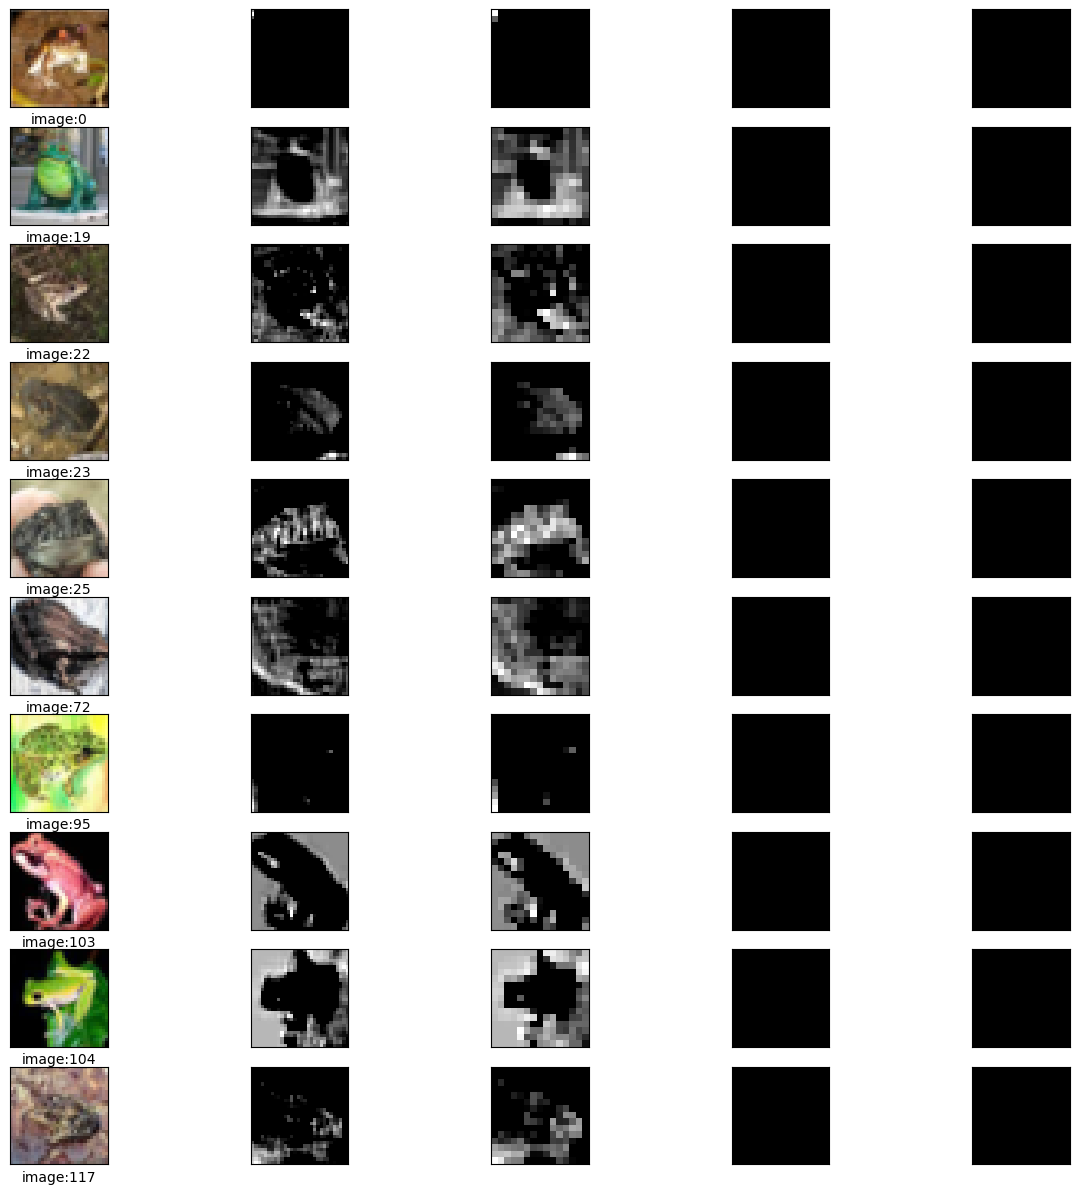

In [23]:
np.argmax(model.predict(train_images[frog_list[0:10]]),axis=1)
#array([6, 6, 6, 6, 3, 6, 6, 6, 6, 6], dtype=int64)

f,ax = plt.subplots(10,5)
f.set_figheight(15)
f.set_figwidth(15)
plt.setp(ax,xticks = [],yticks = [])

for idx, k in enumerate(frog_list[0:10]):
    ax[idx,0].imshow(train_images[k],cmap='gray')
    ax[idx,0].set_xlabel('image:'+str(k))
    for lay_ind in range(0,4):
        f = activation_model.predict(train_images[k].reshape(1,32,32,3))[lay_ind]
        ax[idx,lay_ind+1].imshow(f[0,:,:,1],cmap='gray')

In [24]:
#Plot of a output image by image.
np.argmax(model.predict(train_images))

1563/1563 [==============================] - 10s 7ms/step


283621

C:\Users\cvish\AppData\Local\Temp\ipykernel_14452\3329344728.py:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows,2*columns,2*i+1)


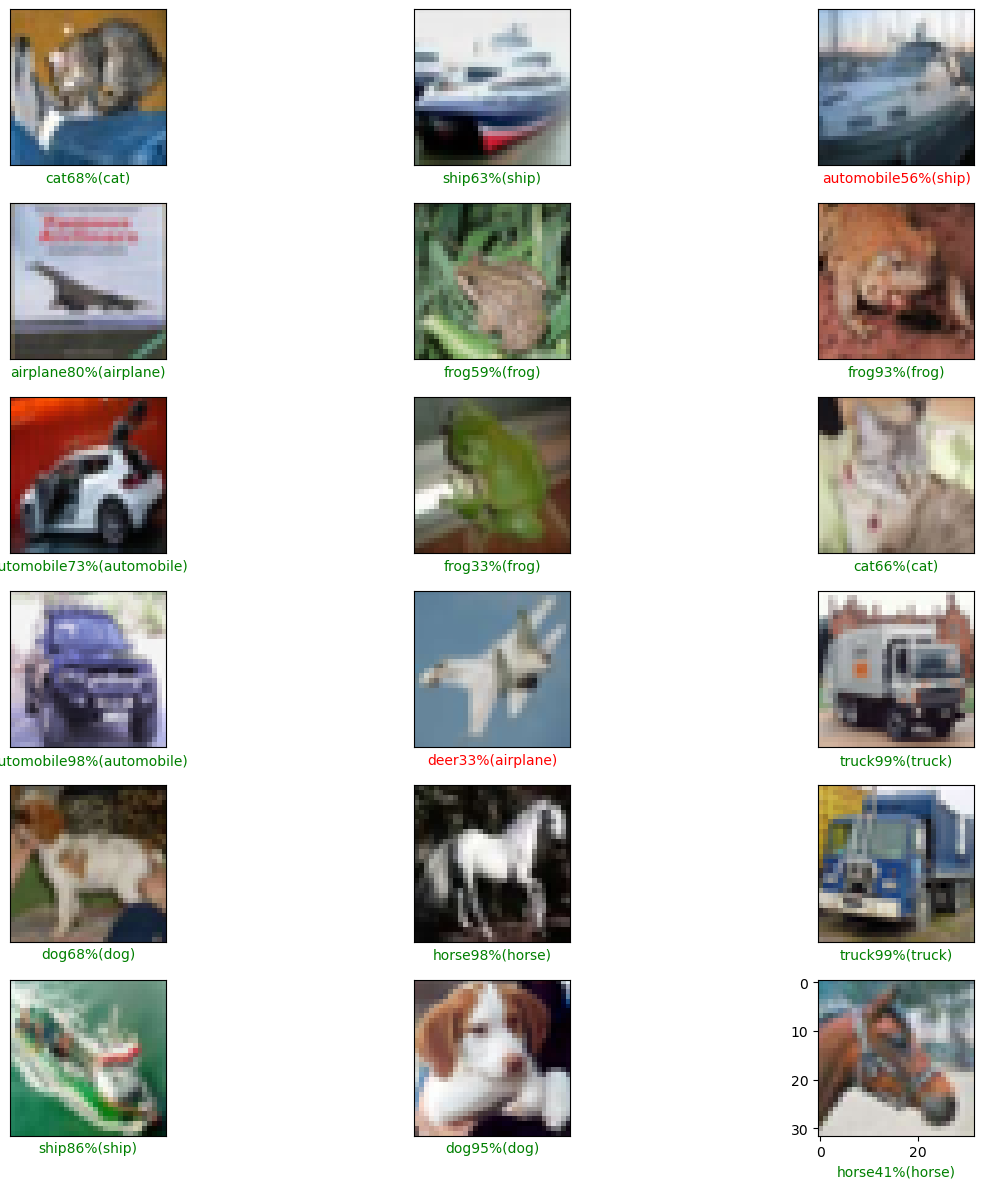

In [25]:
#Use intermediate layers of the trained model to visualize feature maps for some sample images from the test set.
#Plotting the 18 images in the dataset.
rows = 6
columns = 3
images = rows * columns
#Declaring the Figure Size for the Images.
plt.figure(figsize=(2*2*columns,2*rows))
#Disabling the grids for the image.
plt.grid(False)

predicted_labels = np.argmax(prediction,axis=1)

test_labels_rav = np.ravel(test_labels)

for i in range(images):
    plt.xticks([])
    plt.yticks([])
    plt.subplot(rows,2*columns,2*i+1)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    color = 'green' if predicted_labels[i]==test_labels[i] else 'red'
    plt.xlabel(f"{class_names[predicted_labels[i]]}{100*np.max(prediction[i]):2.0f}%({class_names[test_labels_rav[i]]})",color=color)
    
plt.tight_layout()
plt.show()

In [26]:
#Implementing the Dense Layer Model...
#Defining the Dense Neural Network
model_dense = Sequential()

model_dense.add(Flatten(input_shape=(32,32,3)))
model_dense.add(Dense(128,activation='relu'))
model_dense.add(Dense(64,activation='relu'))
model_dense.add(Dense(32,activation='relu'))
model_dense.add(Dense(10,activation='softmax'))

In [27]:
#Summarizing the Model Parameters.
model_dense.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               393344    
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 404,010
Trainable params: 404,010
Non-trainable params: 0
_________________________________________________________________


In [28]:
#Compile the Defined Model with the optimizer and loss function in it..
model_dense.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [29]:
#Training the Model with the HyperParameters.
history_dense = model_dense.fit(train_images, train_labels, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 5s 3ms/step - loss: 1.9661 - accuracy: 0.2794 - val_loss: 1.8191 - val_accuracy: 0.3359
Epoch 2/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.7543 - accuracy: 0.3647 - val_loss: 1.7213 - val_accuracy: 0.3824
Epoch 3/10
1250/1250 [==============================] - 5s 4ms/step - loss: 1.6848 - accuracy: 0.3948 - val_loss: 1.6895 - val_accuracy: 0.3918
Epoch 4/10
1250/1250 [==============================] - 4s 4ms/step - loss: 1.6312 - accuracy: 0.4159 - val_loss: 1.6305 - val_accuracy: 0.4167
Epoch 5/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5902 - accuracy: 0.4273 - val_loss: 1.6252 - val_accuracy: 0.4226
Epoch 6/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5650 - accuracy: 0.4370 - val_loss: 1.5969 - val_accuracy: 0.4300
Epoch 7/10
1250/1250 [==============================] - 4s 3ms/step - loss: 1.5393 - accuracy: 0.4477 - val_loss: 1.5709 - val_accuracy:

In [30]:
#Evaluation of the model using the test data..
test_loss_dense,test_acc_dense = model_dense.evaluate(test_images,test_labels)
print(test_loss_dense,test_acc_dense)

313/313 [==============================] - 1s 2ms/step - loss: 1.5599 - accuracy: 0.4414
1.5598907470703125 0.4413999915122986


In [31]:
#Getting the predictions and Storing them in a literal..
predictions_dense = model_dense.predict(test_images)
print(predictions_dense.shape,test_labels.shape)

313/313 [==============================] - 1s 1ms/step
(10000, 10) (10000, 1)


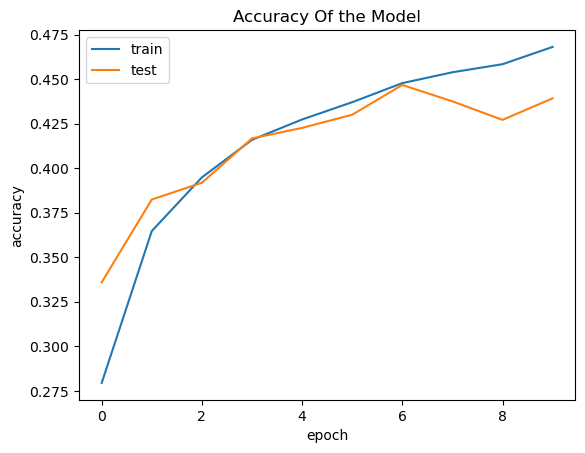

In [34]:
#Accuracy Plot of training and test data.
plt.plot(history_dense.history['accuracy'])
plt.plot(history_dense.history['val_accuracy'])
plt.title('Accuracy Of the Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

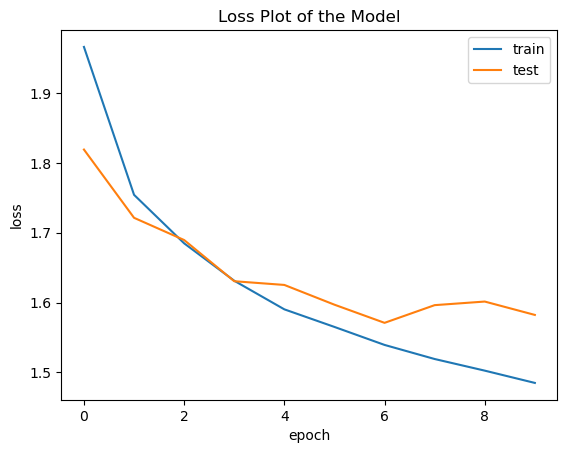

In [35]:
#Loss Plot of training and test data.
plt.plot(history_dense.history['loss'])
plt.plot(history_dense.history['val_loss'])
plt.title("Loss Plot of the Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [36]:
from sklearn.metrics import confusion_matrix,classification_report
#Getting the Trained model for the Dense Layer Neural network..
print(confusion_matrix(np.argmax(predictions_dense,axis=1),test_labels))

[[482  41  84  32  47  23  10  43 109  30]
 [ 53 655  35  38  17  28  36  27  67 287]
 [ 69  15 182  70  61  77  37  46  22  11]
 [ 24  18  66 263  37 205  61  69  27  33]
 [ 80  34 368 201 639 211 276 224  52  26]
 [  5  16  35  77   7 209  13  33  14  15]
 [ 28  12 119 190  95 111 509  47   7  36]
 [ 36  28  67  52  56  73  25 447  11  40]
 [186  91  34  42  30  44  16  27 648 142]
 [ 37  90  10  35  11  19  17  37  43 380]]


In [37]:
#Statistics of the Predictions over the test data.
print(classification_report(np.argmax(predictions_dense,axis=1),test_labels))

              precision    recall  f1-score   support

           0       0.48      0.53      0.51       901
           1       0.66      0.53      0.58      1243
           2       0.18      0.31      0.23       590
           3       0.26      0.33      0.29       803
           4       0.64      0.30      0.41      2111
           5       0.21      0.49      0.29       424
           6       0.51      0.44      0.47      1154
           7       0.45      0.54      0.49       835
           8       0.65      0.51      0.57      1260
           9       0.38      0.56      0.45       679

    accuracy                           0.44     10000
   macro avg       0.44      0.45      0.43     10000
weighted avg       0.50      0.44      0.45     10000



In [ ]:
#Comparision Between the Dense Layer Neural Networks and CNN.
#From the Observation of the both model the training and test accuracies of the CNN is Higher than the Dense Layer NN.

#This is Because in the CNN the each feature is observed using the filters and the edges and corners are also Considered as 
#more prior in the image models.

#Parameter comparision of the Both networks :We require more number of Weights and bias terms in Dense Layer network than 
#in the CNN as they use shared weights and bias terms.CNNs are capable of automatically detecting and capturing features at 
#different scales within the input data.

#Loss and Accuracy from the Above Observations:As the number of epochs increases the CNN model is learning fast compared to 
#the Dense Layer NN for the given dataset.

In [38]:
#Modified CNN Model..
model_modified = Sequential()

model_modified.add(Conv2D(128,(3,3),activation='relu',input_shape = (32,32,3)))
model_modified.add(MaxPooling2D(pool_size=(2,2)))

model_modified.add(Conv2D(96,(3,3),activation='relu'))
model_modified.add(MaxPooling2D(pool_size=(2,2)))

model_modified.add(Conv2D(64,(3,3),activation='relu'))
model_modified.add(MaxPooling2D(pool_size=(2,2)))

model_modified.add(Flatten())
model_modified.add(Dense(32,activation='relu'))

model_modified.add(Dense(10,activation='softmax'))

print(model_modified.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 96)        110688    
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 96)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          55360     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 2, 2, 64)        

In [39]:
#Compiling the Model..
model_modified.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [40]:
#Training the Model With hyper Parameters.
history1 = model_modified.fit(train_images, train_labels, epochs=10, batch_size = 60, validation_split=0.2)

Epoch 1/10
667/667 [==============================] - 68s 102ms/step - loss: 1.7030 - accuracy: 0.3690 - val_loss: 1.4647 - val_accuracy: 0.4663
Epoch 2/10
667/667 [==============================] - 66s 99ms/step - loss: 1.3219 - accuracy: 0.5243 - val_loss: 1.2924 - val_accuracy: 0.5379
Epoch 3/10
667/667 [==============================] - 64s 96ms/step - loss: 1.1761 - accuracy: 0.5819 - val_loss: 1.1621 - val_accuracy: 0.5953
Epoch 4/10
667/667 [==============================] - 68s 101ms/step - loss: 1.0695 - accuracy: 0.6250 - val_loss: 1.1246 - val_accuracy: 0.6029
Epoch 5/10
667/667 [==============================] - 51s 76ms/step - loss: 0.9978 - accuracy: 0.6516 - val_loss: 1.0353 - val_accuracy: 0.6410
Epoch 6/10
667/667 [==============================] - 68s 102ms/step - loss: 0.9366 - accuracy: 0.6705 - val_loss: 1.0071 - val_accuracy: 0.6452
Epoch 7/10
667/667 [==============================] - 66s 99ms/step - loss: 0.8927 - accuracy: 0.6880 - val_loss: 1.0266 - val_accura

In [41]:
test_loss_modified,test_acc_modified = model_modified.evaluate(test_images,test_labels,verbose=0)
print(test_loss_modified,test_acc_modified)

0.9478597640991211 0.6800000071525574


In [42]:
model_modified.save('cifar-10(mode_Modified)(Assignment).h5')

In [43]:
#Getting the predictions and Storing them in a literal..
predictions_modified = model_modified.predict(test_images)
print(predictions_modified.shape,test_labels.shape)

313/313 [==============================] - 3s 9ms/step
(10000, 10) (10000, 1)


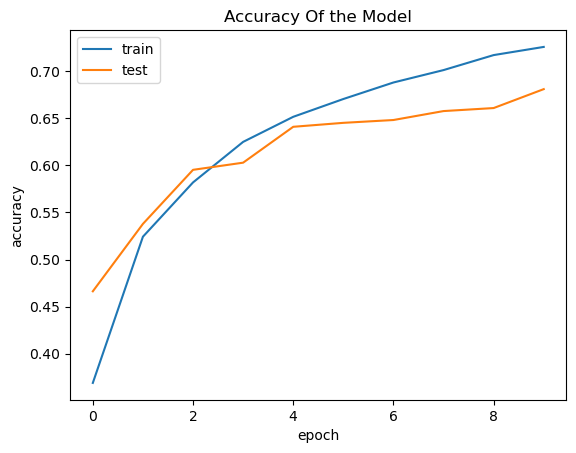

In [44]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Accuracy Of the Model')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

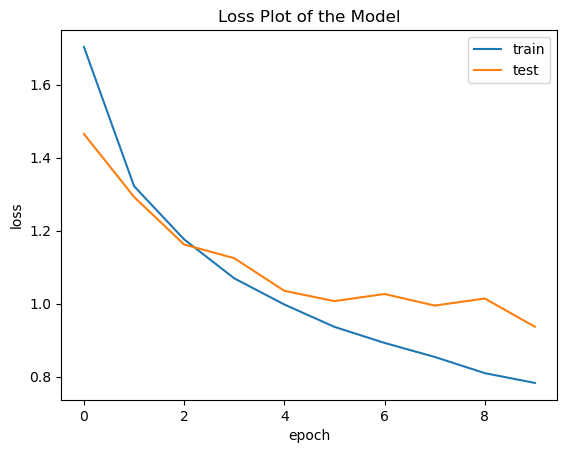

In [45]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("Loss Plot of the Model")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper right')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
#Getting the Trained model for the Dense Layer Neural network..
print(confusion_matrix(np.argmax(predictions_modified,axis=1),test_labels))

[[696  22  51  10  19   5   5  17  85  30]
 [ 26 805   4   4   1   2   3   3  39  59]
 [ 87  10 565  54  93  42  30  38  20   7]
 [ 45  21 113 600 135 254  85  77  36  28]
 [ 10   2  44  35 527  36  22  87   4   3]
 [ 10  11  87 175  66 606  20 123   8  16]
 [ 10  10  96  78  97  21 821  13  12   8]
 [ 10   1  18  15  44  21   1 619   3   6]
 [ 58  20  11   8  13   1   7   3 737  19]
 [ 48  98  11  21   5  12   6  20  56 824]]


In [47]:
#Statistics of the Predictions over the test data.
print(classification_report(np.argmax(predictions_modified,axis=1),test_labels))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72       940
           1       0.81      0.85      0.83       946
           2       0.56      0.60      0.58       946
           3       0.60      0.43      0.50      1394
           4       0.53      0.68      0.60       770
           5       0.61      0.54      0.57      1122
           6       0.82      0.70      0.76      1166
           7       0.62      0.84      0.71       738
           8       0.74      0.84      0.79       877
           9       0.82      0.75      0.78      1101

    accuracy                           0.68     10000
   macro avg       0.68      0.70      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [49]:
#Getting the weights from the saved model..
from keras.models import load_model

model_modified1 = load_model('cifar-10(mode_Modified)(Assignment).h5')

for layer in model_modified1.layers:
    # Check if the layer has weights
    if layer.get_weights():
        weights, biases = layer.get_weights()
        print(f"Layer {layer.name} Weights: {weights}")
        print(f"Layer {layer.name} Biases: {biases}")

Layer conv2d_2 Weights: [[[[ 0.01075656 -0.05590087 -0.02994052 ... -0.0657055  -0.0445592
    -0.02650724]
   [ 0.04163925  0.09780025 -0.00976844 ... -0.02996539 -0.00980253
     0.06695396]
   [-0.05460809  0.00318537  0.02805187 ... -0.04822629  0.13947175
    -0.03393875]]

  [[-0.07124118 -0.03899735 -0.03071491 ... -0.00990807 -0.07610244
     0.05833492]
   [-0.01878077  0.14214681 -0.02074415 ... -0.02798738 -0.05070595
     0.10289087]
   [ 0.01866312 -0.10666602 -0.06753144 ... -0.05275537  0.12707357
     0.1330975 ]]

  [[-0.0291282  -0.07405665 -0.04253835 ... -0.06523215 -0.02354123
     0.16845524]
   [ 0.05295107  0.10068382 -0.02197154 ... -0.00599584 -0.01179235
     0.17152335]
   [-0.00085593 -0.03163136 -0.00701345 ...  0.04047001  0.09740008
     0.11700643]]]


 [[[ 0.01381931 -0.05041413 -0.06843704 ... -0.03292527 -0.03578264
    -0.07931973]
   [ 0.04550193  0.12326342 -0.08976427 ... -0.0700946   0.02891253
    -0.10424834]
   [-0.00673906 -0.12401177 -0.026

In [ ]:
#Comparision between the CNN and Modified CNN.

#Increasing the Number Of Convolution layers increased the Train accuracy slightly.
#But the test accuracy didn't not improve that much which means model is learning on training data and it is overfitting 
#to the given data and forgetting its behaviour of predicting test data.

#Training time is increased as the number of parameters increased over the modified model.

In [ ]:
#Conclusions Drawn From the Above Models.

#For Training the Dataset with images it is better to prefer the Convolutional Neural Networks to get the more insites/features
#about the input data.So, that it would be more helpful when the prediction comes to play.

#CNN shows more Accuracy Compared to Dense Layer Networks for the given Dataset.

#If we increase the Number of Layers in the CNN it might cause the overfitting which interm leads to memorizing the training 
#for the given dataset.  